#Task 
1. run model for different epoch value and calculate psnr and ssim
2.run model for different data size and calculate psnr and ssim

In [1]:
!git clone https://github.com/Thehunk1206/Zero-DCE.git

Cloning into 'Zero-DCE'...
remote: Enumerating objects: 373, done.
remote: Counting objects: 100% (372/372), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 373 (delta 171), reused 356 (delta 158), pack-reused 1
Receiving objects: 100% (373/373), 59.22 MiB | 19.92 MiB/s, done.
Resolving deltas: 100% (171/171), done.


In [2]:
%cd Zero-DCE
!mkdir dataset_v 
!mkdir dataset200
!mkdir dataset56
!mkdir validate

%cd validate 
!mkdir high15
!mkdir low
!mkdir high
%cd /content/Zero-DCE

/content/Zero-DCE
/content/Zero-DCE/validate
/content/Zero-DCE


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from tqdm import tqdm

In [4]:
from skimage import metrics, transform
import cv2
import glob

#Tarining the model on dataset of 56

## Epoch 10

In [ ]:
"""Parameters
      Dataset_size=56
      Epoch=10
      learning rate=1e-3
      filters=32
        """

!python train_model.py --dataset_dir dataset56/ \
                       --model_type zero_dce \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 512 \
                       --IMG_W 512 \
                       --epoch 10\
                       --batch_size 4 \
                       --learning_rate 0.001 \
                       --filters 32 \
                       --iteration 8 

Creating dataset pipeline...

Creating Zero-DCE model...

Compiling the model...

[INFO] Summary of model

Model: "DCE-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 32  9248        ['conv2d[0][0]']   

Text(0.5, 1.0, 'Enhanced')

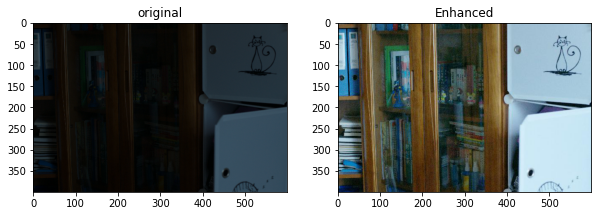

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("validate/low//1.png")
Im_enhanced=Image.open("output/validate/zero_dce_512x512_iter8_10_enhanced_1.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("Enhanced")



In [ ]:
psnr=[]
ssim=[]
resize_imghigh=[]
resize_imglow=[]
print(os.listdir("validate/high15/"))
for img_h in os.listdir("validate/high15/"):
  #print(type(img_h))
  img_re=cv2.imread("validate/high15/"+img_h)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imghigh.append(res)

for img_l in os.listdir("output/validate/"):
  img_re=cv2.imread("output/validate/"+img_l)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imglow.append(res)

for img_true,img_test in zip(resize_imghigh,resize_imglow):
  psnr.append(metrics.peak_signal_noise_ratio(img_true,img_test))
  ssim.append(metrics.structural_similarity(img_true,img_test,multichannel=True))

['146.png', '55.png', '79.png', '780.png', '111.png', '748.png', '22.png', '23.png', '493.png', '1.png', '665.png', '669.png', '778.png', '179.png', '547.png']


In [ ]:
import pandas as pd
metrics_df=pd.DataFrame(list(zip(psnr,ssim)),columns=['PSNR','SSIM'])

In [ ]:
metrics_df

,PSNR,SSIM
0,7.916031,0.182874
1,9.893864,0.341435
2,6.254601,0.155247
3,14.223543,0.268813
4,7.620989,0.228035
5,10.373316,0.241779
6,6.493924,0.119255
7,11.694388,0.352923
8,11.776720,0.183093
9,21.957071,0.820162


### Psnr and ssim

In [ ]:
#data size of 56 with epoch 10

average_psnr=sum(psnr)/len(psnr)
print("Average PSNR:",round(average_psnr,2))

average_ssim=sum(ssim)/len(ssim)
print("Average SSIM:",round(average_ssim,2))

Average PSNR: 11.7
Average SSIM: 0.31


##Epoch 20

In [ ]:
"""Parameters
      Dataset_size=56
      Epoch=20
      learning rate=1e-3
      filters=32
        """

!python train_model.py --dataset_dir dataset56/ \
                       --model_type zero_dce \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 512 \
                       --IMG_W 512 \
                       --epoch 20\
                       --batch_size 4 \
                       --learning_rate 0.001 \
                       --filters 32 \
                       --iteration 8

Creating dataset pipeline...

Creating Zero-DCE model...

Compiling the model...

[INFO] Summary of model

Model: "DCE-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 32  9248        ['conv2d[0][0]']   

Text(0.5, 1.0, 'Enhanced')

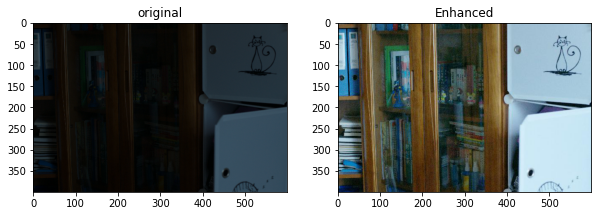

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("validate/low//1.png")
Im_enhanced=Image.open("output/validate/zero_dce_512x512_iter8_10_enhanced_1.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("Enhanced")

In [ ]:
psnr=[]
ssim=[]
resize_imghigh=[]
resize_imglow=[]
print(os.listdir("validate/high15/"))
for img_h in os.listdir("validate/high15/"):
  #print(type(img_h))
  img_re=cv2.imread("validate/high15/"+img_h)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imghigh.append(res)

for img_l in os.listdir("output/validate/"):
  img_re=cv2.imread("output/validate/"+img_l)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imglow.append(res)

for img_true,img_test in zip(resize_imghigh,resize_imglow):
  psnr.append(metrics.peak_signal_noise_ratio(img_true,img_test))
  ssim.append(metrics.structural_similarity(img_true,img_test,multichannel=True))

['146.png', '55.png', '79.png', '780.png', '111.png', '748.png', '22.png', '23.png', '493.png', '1.png', '665.png', '669.png', '778.png', '179.png', '547.png']


In [ ]:
import pandas as pd
metrics_df=pd.DataFrame(list(zip(psnr,ssim)),columns=['PSNR','SSIM'])

In [ ]:
metrics_df

,PSNR,SSIM
0,7.896602,0.182621
1,9.821715,0.341460
2,6.227217,0.154663
3,14.219829,0.270169
4,7.554031,0.228204
5,10.463510,0.241588
6,6.464360,0.120146
7,11.618838,0.353177
8,11.857951,0.184467
9,21.478836,0.818218


### psnr and ssim

In [ ]:
#data size of 56 with epoch 20
average_psnr=sum(psnr)/len(psnr)
print("Average PSNR:",round(average_psnr,2))

average_ssim=sum(ssim)/len(ssim)
print("Average SSIM:",round(average_ssim,2))

Average PSNR: 11.64
Average SSIM: 0.31


# Epoch 30

In [ ]:
"""Parameters
      Dataset_size=56
      Epoch=20
      learning rate=1e-3
      filters=32
        """

!python train_model.py --dataset_dir dataset56/ \
                       --model_type zero_dce \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 512 \
                       --IMG_W 512 \
                       --epoch 30\
                       --batch_size 4 \
                       --learning_rate 0.001 \
                       --filters 32 \
                       --iteration 8

Creating dataset pipeline...

Creating Zero-DCE model...

Compiling the model...

[INFO] Summary of model

Model: "DCE-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 32  9248        ['conv2d[0][0]']   

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("validate/low//1.png")
Im_enhanced=Image.open("output/validate/zero_dce_512x512_iter8_30_enhanced_1.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("Enhanced")

FileNotFoundError: ignored

<Figure size 720x504 with 0 Axes>

In [ ]:
psnr=[]
ssim=[]
resize_imghigh=[]
resize_imglow=[]
print(os.listdir("validate/high15/"))
for img_h in os.listdir("validate/high15/"):
  #print(type(img_h))
  img_re=cv2.imread("validate/high15/"+img_h)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imghigh.append(res)

for img_l in os.listdir("output/validate/"):
  img_re=cv2.imread("output/validate/"+img_l)
  res = cv2.resize(img_re, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
  #print(res.shape)
  resize_imglow.append(res)

for img_true,img_test in zip(resize_imghigh,resize_imglow):
  psnr.append(metrics.peak_signal_noise_ratio(img_true,img_test))
  ssim.append(metrics.structural_similarity(img_true,img_test,multichannel=True))

['146.png', '55.png', '79.png', '780.png', '111.png', '748.png', '22.png', '23.png', '493.png', '1.png', '665.png', '669.png', '778.png', '179.png', '547.png']


In [ ]:
import pandas as pd
metrics_df=pd.DataFrame(list(zip(psnr,ssim)),columns=['PSNR','SSIM'])

In [ ]:
metrics_df

,PSNR,SSIM
0,7.890280,0.182578
1,9.807271,0.341170
2,6.229947,0.154019
3,14.200964,0.269963
4,7.549416,0.227080
5,10.453068,0.241703
6,6.460144,0.120099
7,11.607658,0.352999
8,11.846761,0.183778
9,21.563738,0.818633


In [ ]:
#data size of 56 with epoch 30
average_psnr=sum(psnr)/len(psnr)
print("Average PSNR:",round(average_psnr,2))

average_ssim=sum(ssim)/len(ssim)
print("Average SSIM:",round(average_ssim,2))

Average PSNR: 11.65
Average SSIM: 0.31


#epoch 40

#Running Inference

In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/1.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7fa1480a6dc0>
[info] running inference....
[info] inference time: 2321.077346801758 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/111.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f45ed84be20>
[info] running inference....
[info] inference time: 2289.518117904663 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/146.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f855a808220>
[info] running inference....
[info] inference time: 2305.7162761688232 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/22.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7fb41b02c3d0>
[info] running inference....
[info] inference time: 2466.198444366455 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/23.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7fdeb493eaf0>
[info] running inference....
[info] inference time: 2331.407070159912 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/493.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f57f49763d0>
[info] running inference....
[info] inference time: 2288.4092330932617 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/547.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f161684b3d0>
[info] running inference....
[info] inference time: 2265.5575275421143 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:

!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/55.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f512c0fb3d0>
[info] running inference....
[info] inference time: 2283.113479614258 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/1.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f94e57b3a00>
[info] running inference....
[info] inference time: 2286.2930297851562 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/665.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7ff1fa0c53d0>
[info] running inference....
[info] inference time: 2270.310401916504 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/669.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f2b23d52c40>
[info] running inference....
[info] inference time: 2301.004648208618 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/748.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7fa4e7e573d0>
[info] running inference....
[info] inference time: 2320.539951324463 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/778.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f7111c093d0>
[info] running inference....
[info] inference time: 2294.689178466797 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/780.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7fe91c76c3d0>
[info] running inference....
[info] inference time: 2304.565191268921 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_512x512_iter8_10 \
                                 --img_h 512 \
                                 --img_w 512 \
                                 --image_path validate/low/79.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE object at 0x7f82984613d0>
[info] running inference....
[info] inference time: 2307.3086738586426 ms
Figure(1000x1000)
[info] saved enhanced image to disk


In [ ]:
!python train_model.py --dataset_dir dataset_200/ \
                       --model_type zero_dce_lite \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 256 \
                       --IMG_W 256 \
                       --epoch 5\
                       --batch_size 4 \
                       --learning_rate 0.001 \
                       --filters 32 \
                       --iteration 8 

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

Text(0.5, 1.0, 'Enhanced')

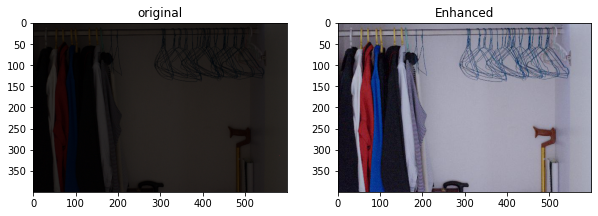

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("datasetv1/146.png")
Im_enhanced=Image.open("output/zero_dce_lite_256x256_iter8_5_enhanced_146.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("Enhanced")

 **Parameters
 
        dataset_size=200
        epoch=10
        learning rate=1e-3
        iterations=8**
"""

In [ ]:
!python train_model.py --dataset_dir dataset_200/ \
                       --model_type zero_dce_lite \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 256 \
                       --IMG_W 256 \
                       --epoch 10\
                       --batch_size 4 \
                       --learning_rate 0.001 \
                       --filters 32 \
                       --iteration 8 

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_10 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

Text(0.5, 1.0, 'Enhanced')

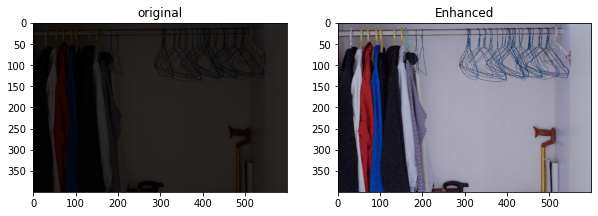

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("datasetv1/146.png")
Im_enhanced=Image.open("output/zero_dce_lite_256x256_iter8_10_enhanced_146.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("Enhanced")

 **parameters
 
        dataset_size=200
        epoch=5
        learning rate=1e-2
        iterations=8**


In [ ]:
!python train_model.py --dataset_dir dataset_200/ \
                       --model_type zero_dce_lite \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 256 \
                       --IMG_W 256 \
                       --epoch 5\
                       --batch_size 4 \
                       --learning_rate 0.01 \
                       --filters 32 \
                       --iteration 8 

training...: 100% 45/45 [00:14<00:00,  3.10steps/s]
validating...: 100% 3/3 [00:00<00:00,  4.07steps/s]
ETA:0.25 - epoch: 1 - loss: 8.052932739257812  val_loss: 4.551642417907715

Writing logs to TensorBoard...

training...: 100% 45/45 [00:09<00:00,  4.51steps/s]
validating...: 100% 3/3 [00:00<00:00, 12.75steps/s]
ETA:0.17 - epoch: 2 - loss: 12.88917064666748  val_loss: 8.775504112243652

Writing logs to TensorBoard...

training...: 100% 45/45 [00:09<00:00,  4.51steps/s]
validating...: 100% 3/3 [00:00<00:00, 12.75steps/s]
ETA:0.17 - epoch: 3 - loss: 5.12539005279541  val_loss: 4.70031213760376

Writing logs to TensorBoard...

training...: 100% 45/45 [00:10<00:00,  4.47steps/s]
validating...: 100% 3/3 [00:00<00:00, 12.60steps/s]
ETA:0.17 - epoch: 4 - loss: 6.061970233917236  val_loss: 3.9254443645477295

Writing logs to TensorBoard...

training...: 100% 45/45 [00:09<00:00,  4.53steps/s]
validating...: 100% 3/3 [00:00<00:00, 11.62steps/s]
ETA:0.17 - epoch: 5 - loss: 4.843994617462158  va

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 1 \
                                 --save_result 1 \
                                 --iteration 8

Traceback (most recent call last):
  File "command_line_scripts/single_image_enhance.py", line 112, in <module>
    main()
  File "command_line_scripts/single_image_enhance.py", line 109, in main
    run_inference(args.model_path, args.image_path, args.img_h, args.img_w, args.iteration, args.plot, args.save_result)
  File "command_line_scripts/single_image_enhance.py", line 64, in run_inference
    model = get_model(model_path)
  File "/content/Zero-DCE/command_line_scripts/utils.py", line 79, in get_model
    assert os.path.exists(model_path) , 'model_path must be a valid path'
AssertionError: model_path must be a valid path


In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("validate/low/1.png")
Im_enhanced=Image.open("output/validate/zero_dce_256x256_iter8_10_enhanced_1.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("Enhanced")

FileNotFoundError: ignored

<Figure size 720x504 with 0 Axes>

**Paremeters

      dataset_size=200
      epoch=10
      learning rate=1e-3
      iterations=4
      **

In [ ]:
!python train_model.py --dataset_dir dataset_200/ \
                       --model_type zero_dce_lite \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 256 \
                       --IMG_W 256 \
                       --epoch 10\
                       --batch_size 4 \
                       --learning_rate 0.001 \
                       --filters 32 \
                       --iteration 4

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter4/zero_dce_lite_256x256_iter4_10 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/146.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 4

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE_lite object at 0x7ff4ab620280>
[info] running inference....
[info] inference time: 1985.9867095947266 ms
[info] saved enhanced image to disk


Text(0.5, 1.0, 'Enhanced')

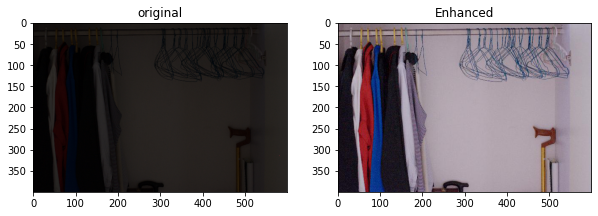

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("datasetv1/146.png")
Im_enhanced=Image.open("output/zero_dce_lite_256x256_iter8_5_enhanced_146.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("Enhanced")

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter4/zero_dce_lite_256x256_iter4_10 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/1.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE_lite object at 0x7f1f0585b280>
[info] running inference....
[info] inference time: 2001.363754272461 ms
[info] saved enhanced image to disk


Text(0.5, 1.0, 'Enhanced')

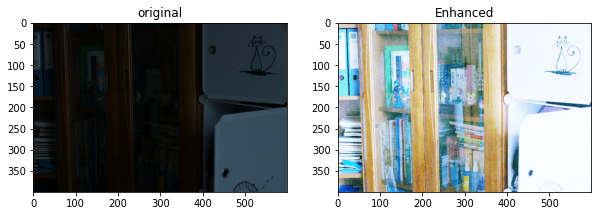

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("datasetv1/1.png")
Im_enhanced=Image.open("output/zero_dce_lite_256x256_iter4_10_enhanced_1.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("Enhanced")

In [ ]:
!python train_model.py --dataset_dir dataset_200/ \
                       --model_type zero_dce_lite \
                       --checkpoint_dir Trained_model/ \
                       --IMG_H 256 \
                       --IMG_W 256 \
                       --epoch 40\
                       --batch_size 4 \
                       --learning_rate 0.001 \
                       --filters 32 \
                       --iteration 8 

In [ ]:
! python command_line_scripts/single_image_enhance.py --model_path Trained_model/zero_dce_lite_iter8/zero_dce_lite_256x256_iter8_5 \
                                 --img_h 256 \
                                 --img_w 256 \
                                 --image_path datasetv1/1.png \
                                 --plot 0 \
                                 --save_result 1 \
                                 --iteration 8

[info] loading model from disk....
loaded model: <keras.saving.saved_model.load.ZeroDCE_lite object at 0x7f0236a9e490>
[info] running inference....
[info] inference time: 2099.802017211914 ms
[info] saved enhanced image to disk


Text(0.5, 1.0, 'Enhanced')

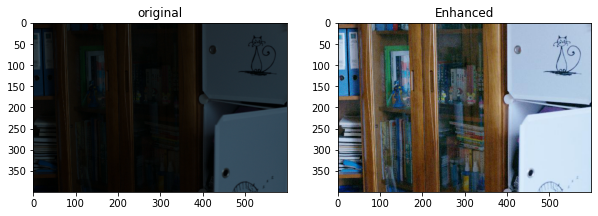

In [ ]:
fig=plt.figure(figsize=(10,7))
rows=1
column=2
Im_original=Image.open("datasetv1/1.png")
Im_enhanced=Image.open("output/zero_dce_lite_256x256_iter8_5_enhanced_1.jpg")


fig.add_subplot(rows,column,1)
plt.imshow(Im_original)
plt.title("original")

fig.add_subplot(rows,column,2)
plt.imshow(Im_enhanced)
plt.title("Enhanced")